# CLUSTERING AND MOOD PREDICTION

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns
#set style of plots
sns.set_style('white')
#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)
# Ignore useless warnings (see SciPy issue #5998)


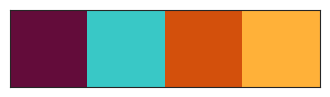

In [1]:
import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns
#set style of plots
sns.set_style('white')
#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)
# Ignore useless warnings (see SciPy issue #5998)


In [2]:
path='data_moods.csv'

In [3]:
data=pd.read_csv('data_moods.csv')

In [4]:
s=data.groupby("artist")["popularity"].sum().sort_values(ascending=False).head(170652)

In [5]:
s.head(10)

artist
Various Artists        305
Prince                 265
Billie Eilish          257
Linkin Park            240
My Chemical Romance    238
Wilson Trouvé          183
Lewis Capaldi          169
Blasterjaxx            167
The Beatles            157
Monocle Twins          156
Name: popularity, dtype: int64

# DATA PREPROCESSING

In [6]:
features = data[['danceability','liveness','acousticness','loudness','speechiness','valence','energy']]

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'energy'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

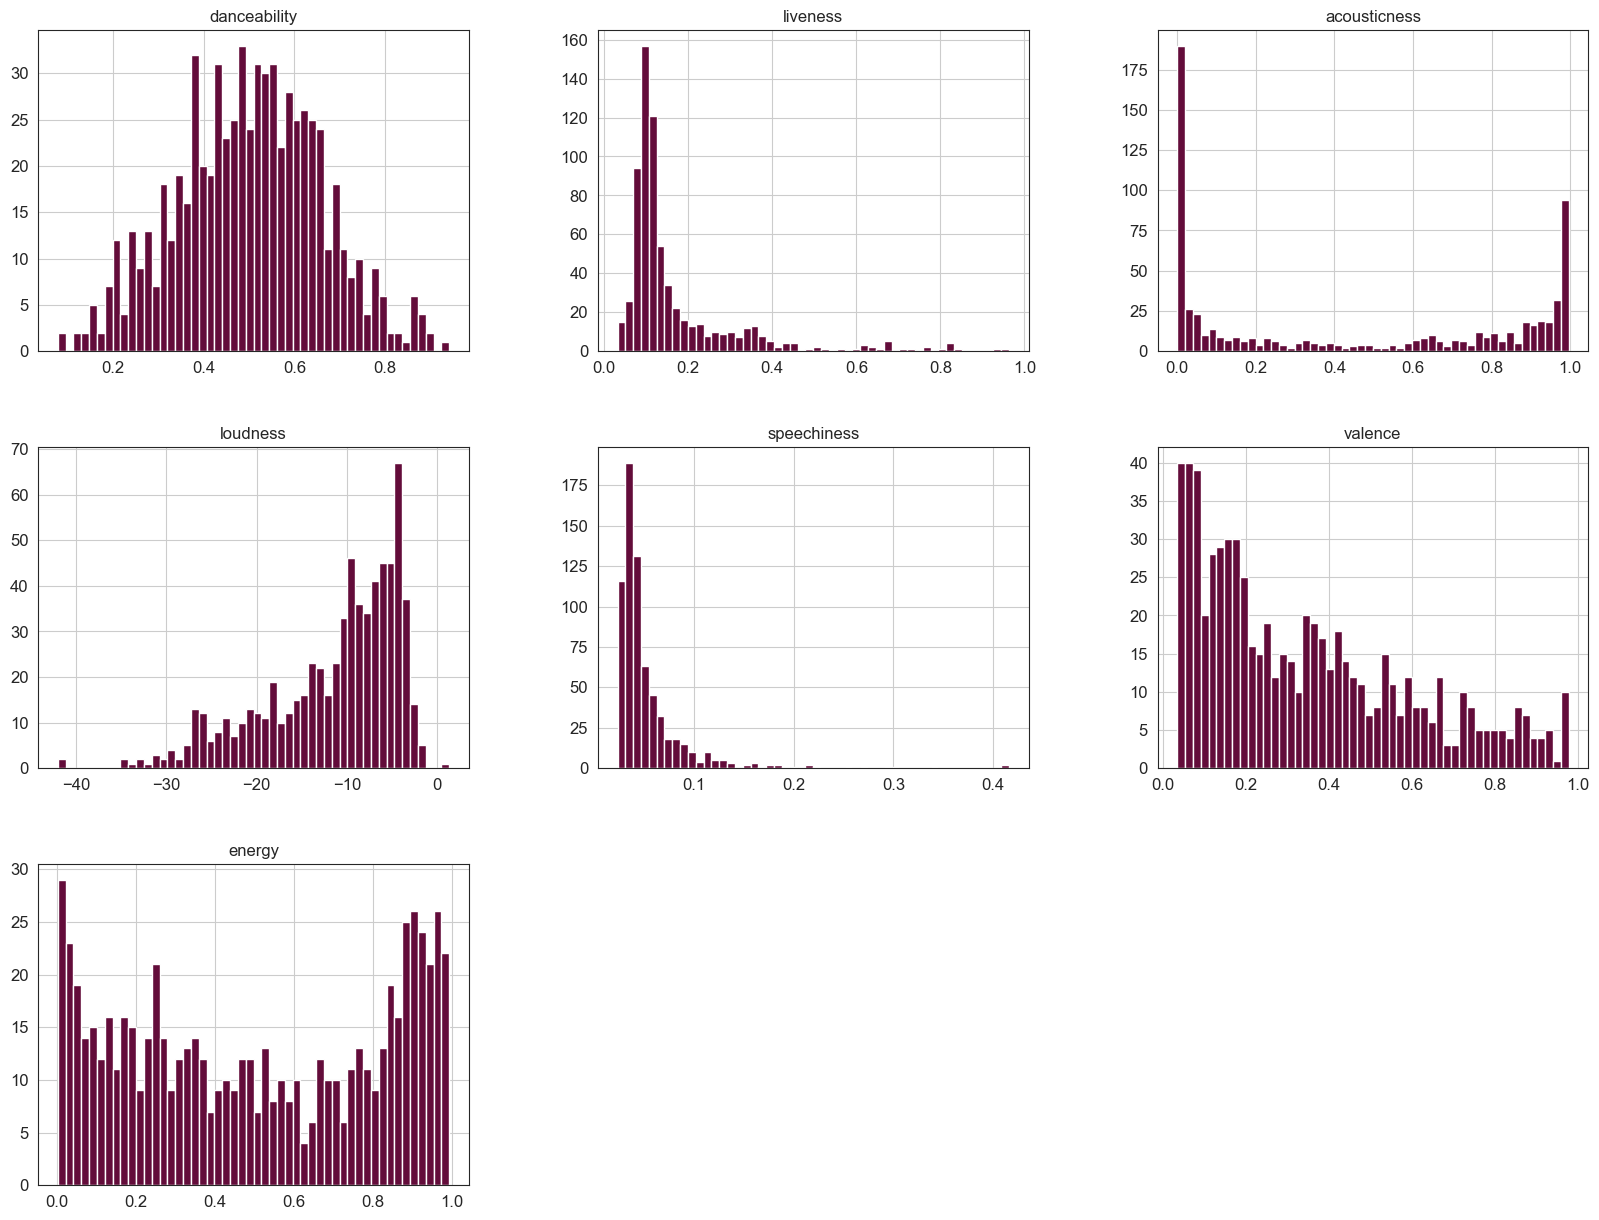

In [7]:
from sklearn import preprocessing

loudness = features[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
data['loudness'] = pd.DataFrame(loudness_scaled)




features.hist(bins=50,figsize=(20,15))

In [8]:
from sklearn.cluster import KMeans

sse = {}
K = range(1,12)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    sse[k]=km.inertia_

C:\Users\SACHIN giyo SUNNY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SACHIN giyo SUNNY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SACHIN giyo SUNNY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SACHIN giyo SUNNY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users

# K NEAREST NEIGHBOR ALGORITHM

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
labels=kmeans.labels_

C:\Users\SACHIN giyo SUNNY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
rfm=data.assign(Cluster=labels)
group=rfm.groupby(["Cluster"])
group.agg({
    
    'danceability':'mean',
    'loudness':'mean',
     'valence':'mean',
    'acousticness':['mean','count'],
   

}).round(1)

danceability loudness valence acousticness      
                mean     mean    mean         mean count
Cluster                                                 
0                0.5      0.8     0.4          0.2   404
1                0.5      0.6     0.2          0.7   178
2                0.4      0.4     0.2          1.0   105

In [11]:
rfm_melt=pd.melt(rfm.reset_index(), id_vars =['artist','Cluster'],value_vars=['danceability','loudness','acousticness','valence'],var_name='Metric',value_name='Value')

<AxesSubplot:title={'center':'snake plot'}, xlabel='Metric', ylabel='Value'>

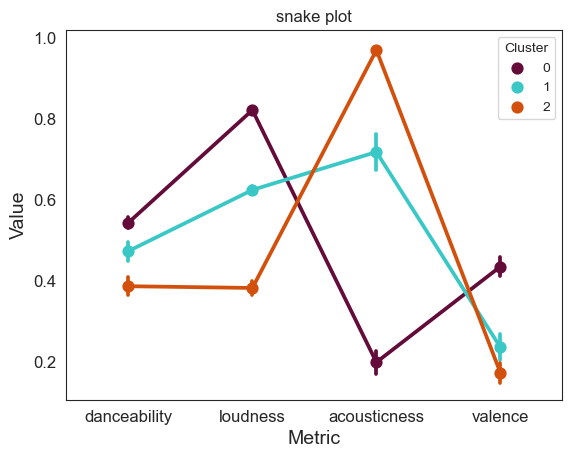

In [12]:
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('snake plot')
sns.pointplot(data=rfm_melt,x='Metric',y='Value',hue='Cluster')

In [13]:
rfm[rfm['Cluster']==1]

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood,Cluster
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,06-11-2006,60,217946,0.346,0.913,0.1390,0.000077,0.0934,0.1160,0.615590,0.0321,136.168,0,4,Sad,1
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,21-08-1984,2,233000,0.466,0.089,0.4380,0.000006,0.1130,0.5870,0.672509,0.0608,193.100,4,4,Happy,1
11,Adjustments,Adjustments,Josie Mehlin,6w0vhPaZBYjhrDobs3QE14,17-01-2020,52,182000,0.532,0.974,0.5410,0.864000,0.2280,0.3290,0.693865,0.0283,136.063,0,4,Calm,1
12,Adrift,Adrift,Cooper Sams,3TNNGjgOQ7O8vwAlvlD9Fg,21-03-2018,53,158117,0.382,0.497,0.3330,0.918000,0.1060,0.0486,0.609894,0.0367,84.974,7,4,Calm,1
14,Africa,Toto IV,TOTO,2374M0fQpWi3dLnB54qaLX,08-04-1982,84,295893,0.671,0.257,0.3730,0.000079,0.0481,0.7320,0.552445,0.0323,92.717,9,4,Happy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,mellow,sleep escape,cloudcrush,1yJXNOEP2bq1N1691n37oS,20-05-2020,48,144434,0.609,0.985,0.1570,0.792000,0.1120,0.0698,0.604843,0.0322,111.966,0,4,Calm,1
676,no song without you,no song without you,HONNE,3KKUf8F2hktFscLgbH4YwR,12-06-2020,75,161536,0.778,0.463,0.4620,0.583000,0.1100,0.8170,0.675484,0.0359,105.450,0,4,Sad,1
678,the frost,sentience,praam,7l4b5JYnl1WwUfvJgKmUwr,24-01-2020,35,254440,0.259,0.956,0.2590,0.942000,0.0923,0.0403,0.533395,0.0594,123.693,3,4,Calm,1
680,when the party's over,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,43zdsphuZLzwA9k4DJhU0I,29-03-2019,87,196077,0.367,0.978,0.1110,0.000040,0.0897,0.1980,0.644234,0.0972,82.642,4,4,Sad,1


In [14]:
rfm[rfm['Cluster']==2]

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood,Cluster
5,A Burden to Bear,A Burden to Bear,Emmanuelle Rimbaud,67DOFCrkcQaLp5yhzF8Y8N,31-07-2020,27,129410,0.394,0.995,0.0475,0.955,0.1050,0.1720,0.359456,0.0720,71.241,6,5,Calm,2
6,A La Plage,A La Plage,Ron Adelaar,79NmiFAgcXUIVDGfCWDdWF,07-08-2020,29,141888,0.504,0.994,0.0584,0.956,0.1150,0.5530,0.497163,0.0516,134.209,5,4,Calm,2
15,After The Rain,After The Rain,Comet Blue,2XBc2jWnvPqNO2LebVtLaY,03-08-2020,24,116625,0.456,0.993,0.0337,0.948,0.1260,0.3000,0.349354,0.0334,97.199,0,4,Calm,2
27,Ambre,Wintermusik,Nils Frahm,0suQ6B8Bsp0tFuCXx652Az,04-12-2009,0,227639,0.391,0.992,0.0576,0.947,0.1170,0.3590,0.378990,0.0342,145.569,10,3,Calm,2
28,Anaviosi,Anaviosi,Alexi Musnitsky,4OWZLr2sLv7ueKPHV7JRNP,09-07-2020,38,174244,0.391,0.995,0.0121,0.946,0.0959,0.1180,0.401983,0.0852,68.128,1,4,Calm,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,coeur noir,coeur noir,Leo Nocta,0JsYp2UosjQpePYbHCvXWZ,17-07-2020,34,262280,0.235,0.926,0.2330,0.890,0.0690,0.1640,0.480743,0.0712,66.866,11,3,Calm,2
679,the theme song,notion,Teodor Wolgers,3n2QaRyg5nTg5Cwwq5mw3Q,24-04-2020,36,159840,0.604,0.986,0.0300,0.952,0.1050,0.1500,0.346195,0.0386,117.781,0,4,Calm,2
681,windcatcher,windcatcher,Leo Nocta,59VApBbrS2IADQk4ml5mdo,19-06-2020,36,123066,0.402,0.961,0.2360,0.919,0.0921,0.1460,0.493612,0.0603,129.736,0,3,Calm,2
685,æfre,æfre,praam,2irbT1BSYaIEF44PlyKaoM,17-07-2020,41,186331,0.377,0.994,0.0156,0.881,0.0991,0.0804,0.313261,0.0397,140.179,0,4,Calm,2


In [15]:
rfm[rfm['Cluster']==0]

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood,Cluster
0,She makes me so unsure,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,27-10-1982,68,379266,0.866,0.137000,0.730,0.000,0.0843,0.6250,0.779912,0.0767,118.523,5,4,Happy,0
1,Twenty-three seconds,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,16-04-2007,43,318800,0.381,0.018900,0.832,0.196,0.1530,0.1660,0.852145,0.0492,120.255,8,4,Sad,0
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,01-01-2004,60,268000,0.419,0.001710,0.932,0.000,0.1370,0.4450,0.885932,0.1060,169.881,1,4,Energetic,0
7,A Little Less Conversation - JXL Radio Edit Remix,Elvis 75 - Good Rockin' Tonight,Elvis Presley,4l2hnfUx0esSbITQa7iJt0,28-12-2009,1,211173,0.586,0.000155,0.935,0.277,0.1590,0.5800,0.752583,0.0482,114.997,4,4,Happy,0
8,A Place for My Head,Hybrid Theory (Bonus Edition),Linkin Park,5rAxhWcgFng3s570sGO2F8,24-10-2000,68,184640,0.603,0.014400,0.908,0.000,0.6710,0.4570,0.847878,0.1840,133.063,11,4,Energetic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,i don't want to watch the world end with someo...,i don't want to watch the world end with someo...,Clinton Kane,58qX77t2VWMWcycsh9zKLc,08-05-2020,68,184505,0.535,0.771000,0.359,0.000,0.1110,0.4880,0.753575,0.0607,154.163,2,4,Sad,0
674,lovely (with Khalid),lovely (with Khalid),Billie Eilish,0u2P5u6lvoDfwTYjAADbn4,19-04-2018,88,200185,0.351,0.934000,0.296,0.000,0.0950,0.1200,0.735909,0.0333,115.284,4,4,Sad,0
677,pass you by,the voicenotes,Alaina Castillo,4NVwMupCTfITPXetR5aozp,24-04-2020,60,245945,0.510,0.892000,0.355,0.000,0.1330,0.4530,0.810309,0.0287,141.796,11,4,Sad,0
682,yellow is the color of her eyes,yellow is the color of her eyes,Soccer Mommy,4D3nttJPU6L0M2epr7sId6,19-11-2019,5,435080,0.452,0.757000,0.515,0.120,0.1400,0.1910,0.799516,0.0255,80.537,11,4,Sad,0
